In [15]:
import arcgis
from arcgis.gis import GIS
from arcgis.learn import classify_pixels
from arcgis.raster.functions import equal_to
from arcgis.raster.functions import extract_band


import pandas as pd
from datetime import datetime as dt
from ipywidgets import HBox, VBox, Label, Layout

import os
import glob
import zipfile
from pathlib import Path
from arcgis.learn import prepare_data, MMDetection

In [2]:
username = "foretifyDev" 

password = 'ForetifyTillIDie2022!!'
gis = GIS("https://foretifydev.maps.arcgis.com/", username, password)

<Item title:"mussel_farm_training_imagery" type:Imagery Layer owner:demos_deldev>
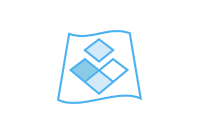

In [3]:
mussel_image = gis.content.get("f2b92eed10394e5eb3c7f135861937d9")
mussel_image

<Item title:"MusselFarms" type:Feature Layer Collection owner:api_data_owner>
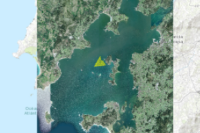

In [4]:
training_feature_layer = gis.content.get('ff6a48b3391c4a24b807af0eb08bb6c1')
training_feature_layer

<Item title:"musselfarm_detection_training_data" type:Image Collection owner:api_data_owner>
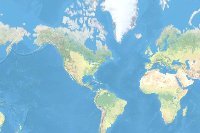

In [5]:
training_data = gis.content.get('57cb821dedca4c5598e81c8d2d510c91')
training_data

In [6]:
filepath = training_data.download(file_name=training_data.name)

In [7]:
filepath

'/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/musselfarm_detection_training_data.zip'

In [8]:
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [9]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))

In [10]:
data = prepare_data(data_path, batch_size=4, chip_size=448)

Exception: Traceback (most recent call last):

  File "/Users/williamhan/opt/anaconda3/lib/python3.9/site-packages/arcgis/learn/_data.py", line 23, in <module>
    from fastai.vision.data import imagenet_stats, ImageList, bb_pad_collate

ImportError: cannot import name 'ImageList' from 'fastai.vision.data' (/Users/williamhan/opt/anaconda3/lib/python3.9/site-packages/fastai/vision/data.py)
 

Deep learning dependencies are missing. This module requires fastai, PyTorch, torchvision. 

Please install all required dependencies by following the instructions at: 
https://developers.arcgis.com/python/guide/install-and-set-up/#Install-deep-learning-dependencies


In [17]:
import fastai
from fastai.vision.data import imagenet_stats, ImageList

ImportError: cannot import name 'ImageList' from 'fastai.vision.data' (/Users/williamhan/opt/anaconda3/lib/python3.9/site-packages/fastai/vision/data.py)

In [ ]:
    from fastai.vision.data import imagenet_stats, ImageList, bb_pad_collate
    from fastai.vision.transform import (
        crop,
        rotate,
        dihedral_affine,
        brightness,
        contrast,
        skew,
        rand_zoom,
        get_transforms,
        flip_lr,
        ResizeMethod,
    )
    from fastai.vision import ImageDataBunch, parallel, ifnone
    import fastai.vision
    from fastai.torch_core import data_collate
    from fastai.core import Category